# Classification on Bill Dataset

## Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

## Load Dataset

In [8]:
df = pd.read_csv('bill_authentication.csv')

## Perform EDA

In [9]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [11]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Construct matrix of feats, output vector, and perform train-test split

In [12]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Training Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy:  98.05825242718447 %


#### Confusion Matrix

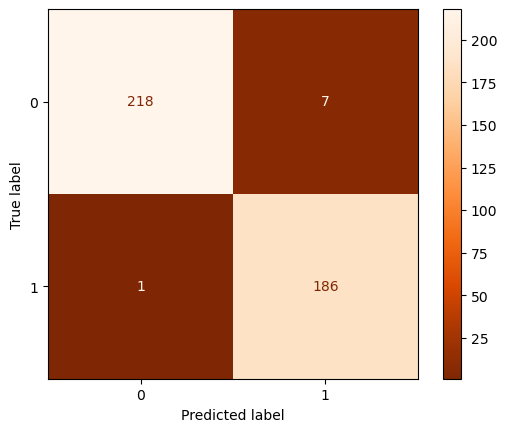

In [33]:
conf_mat_dt = metrics.confusion_matrix(y_test, y_pred)
cmat_dt = metrics.ConfusionMatrixDisplay(conf_mat_dt)
cmat_dt.plot(cmap='Oranges_r')

## Training SVM Classifier

In [34]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_svm)*100, "%")

Accuracy:  99.75728155339806 %


#### Confusion Matrix

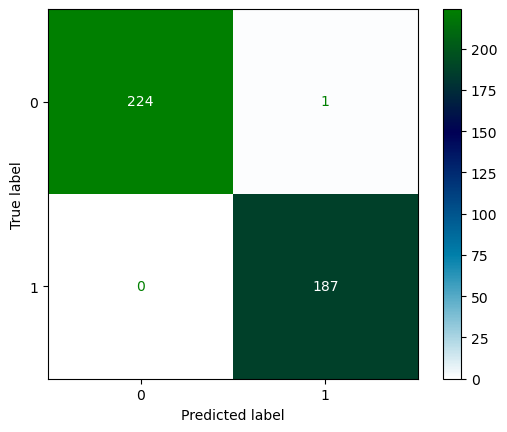

In [35]:
conf_mat_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cmat_svm = metrics.ConfusionMatrixDisplay(conf_mat_svm)
cmat_svm.plot(cmap='ocean_r')